In [1]:
%load_ext autoreload
%autoreload 2

from cap.dehaze import dehaze as cap_dehaze
from dcp.dehaze import dehaze as dcp_dehaze
from config import config
from measure import compute_psnr, compute_ssim
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2

In [3]:
_RESIDE_PATH = 'D:\\data\\reside\\indoor_train'
_RESULT_PATH = '../result'

In [4]:
hazy_fold_path = os.path.join(_RESIDE_PATH,'hazy')
clear_fold_path = os.path.join(_RESIDE_PATH,'clear')

In [6]:
def get_clear(hazy_img_path, clear_fold_path):
    hazy_img_path = hazy_img_path.replace('\\', '/')
    clear_file = hazy_img_path.split('/')[-1].split('_')[0] + '.png'
    clear_img_path = os.path.join(clear_fold_path, clear_file)
    return clear_img_path

In [42]:
def show_compaire(hazy, clear, result_path, save = False):
    """
    all is the files
    """
    hazy_img = cv2.imread(hazy)
    clear_img = cv2.imread(clear)
    
    dehaze_1 = dcp_dehaze(hazy, config['dcp'])
    dehaze_2 = cap_dehaze(hazy, config['cap'])
    
    fig = plt.figure(figsize=(20, 20), dpi=80)
    ax1 = fig.add_subplot(1,4,1)
    ax1.imshow(hazy_img)
    plt.axis('off')
    ax1.set_title('Hazy Image')
    ax2 = fig.add_subplot(1,4,2)
    ax2.imshow(dehaze_1)
    plt.axis('off')
    ax2.set_title('Dehaze Image DCP')

    ax3 = fig.add_subplot(1,4,3)
    ax3.imshow(dehaze_2)
    plt.axis('off')
    ax3.set_title('Dehaze Image CAP')

    ax4 = fig.add_subplot(1,4,4)
    ax4.imshow(clear_img)
    plt.axis('off')
    ax4.set_title('Clear Image')
    
    if save:  
        case_name = clear.replace('\\','/').split('/')[-1].replace('.png','')
        fig.savefig(os.path.join(result_path,case_name+'.png'))
        plt.close(fig) 
    plt.show()

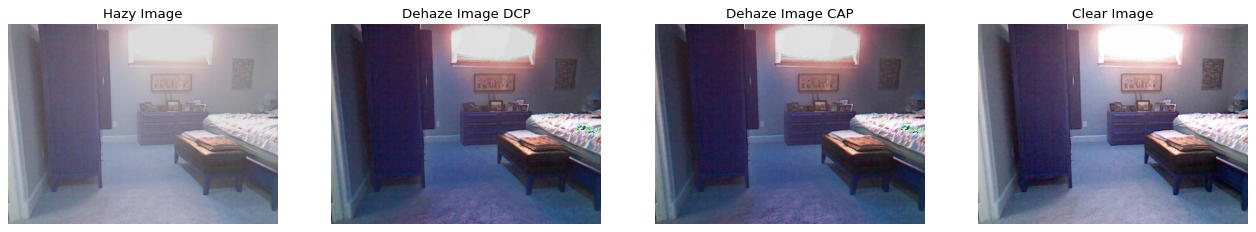

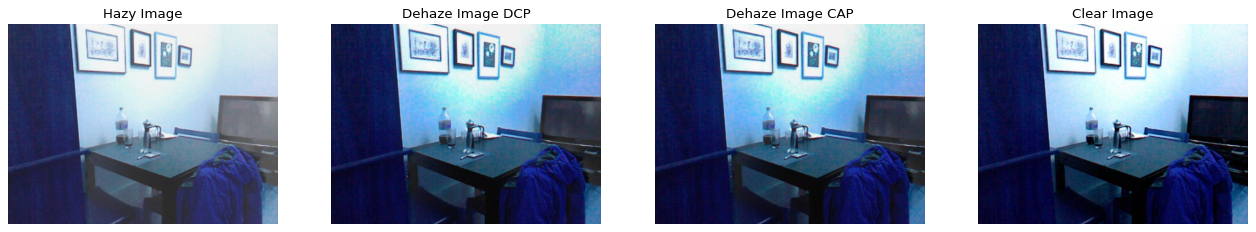

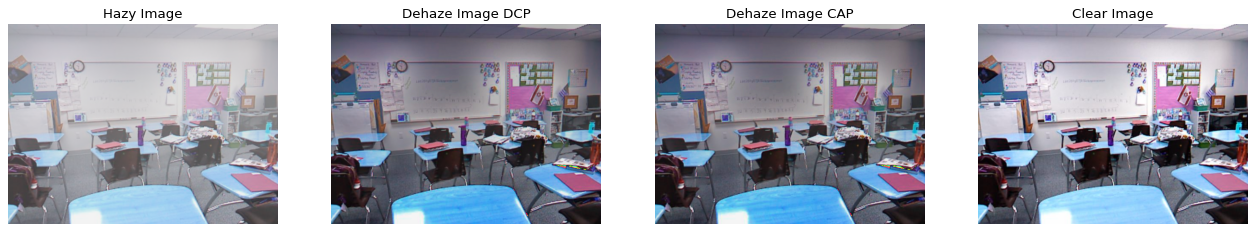

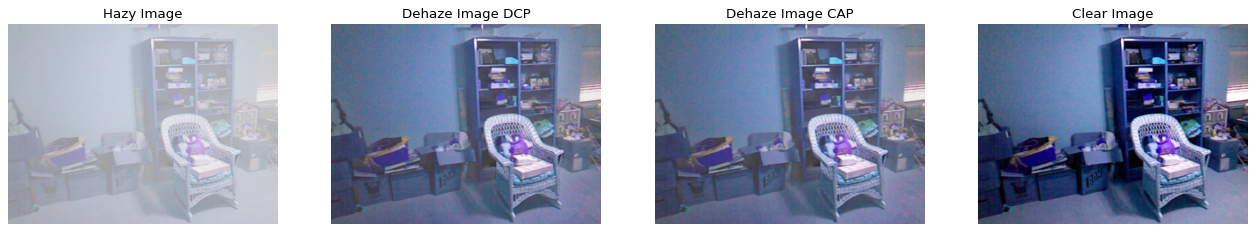

In [65]:
for i in range(1,5):
    list_hazy_imgs = glob(os.path.join(hazy_fold_path, f'{i}*.png'))
    hazy = list_hazy_imgs[0]
    clear = get_clear(hazy, clear_fold_path)
    show_compaire(hazy, clear, _RESULT_PATH)
#     plt.show()